# Exploratory Data Analysis with Canada Immigration Dataset

## Imports

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns
import numpy as np
sns.set()

## Preprocessing

### Reading excel file and converting it to csv

In [2]:
data_xls = pd.read_excel('Canada.xlsx', 'Canada by Citizenship', index_col=None)
data_xls.to_csv('canada.csv', encoding='utf-8', index=False)

In [3]:
df = pd.read_csv("canada.csv")

### Looking at first rows of dataset and important statistical measure

In [4]:
df.head()

,Type,Coverage,OdName,AREA,AreaName,REG,RegName,DEV,DevName,1980,...,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013
0,Immigrants,Foreigners,Afghanistan,935,Asia,5501,Southern Asia,902,Developing regions,16,...,2978,3436,3009,2652,2111,1746,1758,2203,2635,2004
1,Immigrants,Foreigners,Albania,908,Europe,925,Southern Europe,901,Developed regions,1,...,1450,1223,856,702,560,716,561,539,620,603
2,Immigrants,Foreigners,Algeria,903,Africa,912,Northern Africa,902,Developing regions,80,...,3616,3626,4807,3623,4005,5393,4752,4325,3774,4331
3,Immigrants,Foreigners,American Samoa,909,Oceania,957,Polynesia,902,Developing regions,0,...,0,0,1,0,0,0,0,0,0,0
4,Immigrants,Foreigners,Andorra,908,Europe,925,Southern Europe,901,Developed regions,0,...,0,0,1,1,0,0,0,0,1,1


In [5]:
df.describe()

,AREA,REG,DEV,1980,1981,1982,1983,1984,1985,1986,...,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013
count,197.000000,197.000000,197.000000,197.000000,197.000000,197.000000,197.000000,197.000000,197.000000,197.000000,...,197.000000,197.00000,197.000000,197.000000,197.000000,197.000000,197.000000,197.000000,197.000000,197.000000
mean,913.639594,1246.477157,902.741117,1453.167513,1306.000000,1230.203046,905.431472,896.162437,856.304569,1008.639594,...,2394.131980,2662.35533,2554.720812,2403.583756,2510.091371,2560.101523,2849.614213,2525.360406,2618.304569,2629.654822
std,15.637379,1179.730385,9.782793,10784.524807,9449.373841,8864.905615,6503.149859,6452.570413,6155.858422,7205.630681,...,17119.626937,19104.65330,18261.461660,17129.490442,17908.071420,18276.881231,20386.174875,18082.496369,18763.159434,18838.224387
min,903.000000,905.000000,901.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,903.000000,914.000000,902.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,...,21.000000,29.00000,26.000000,32.000000,32.000000,37.000000,42.000000,38.000000,43.000000,45.000000
50%,908.000000,922.000000,902.000000,14.000000,10.000000,12.000000,12.000000,14.000000,17.000000,21.000000,...,196.000000,211.00000,230.000000,198.000000,205.000000,217.000000,216.000000,196.000000,235.000000,217.000000
75%,935.000000,926.000000,902.000000,266.000000,299.000000,299.000000,197.000000,207.000000,202.000000,257.000000,...,866.000000,857.00000,856.000000,975.000000,975.000000,917.000000,953.000000,851.000000,799.000000,852.000000
max,999.000000,5501.000000,999.000000,143137.000000,128641.000000,121175.000000,89185.000000,88272.000000,84346.000000,99351.000000,...,235822.000000,262242.00000,251640.000000,236753.000000,247244.000000,252170.000000,280687.000000,248748.000000,257903.000000,259021.000000


### Initial data cleaning for easier handling

In [6]:
# Droping columns we will not use
df.drop(['AREA', 'REG', 'DEV', 'Type', 'Coverage'], axis=1, inplace=True)
df.head()

,OdName,AreaName,RegName,DevName,1980,1981,1982,1983,1984,1985,...,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013
0,Afghanistan,Asia,Southern Asia,Developing regions,16,39,39,47,71,340,...,2978,3436,3009,2652,2111,1746,1758,2203,2635,2004
1,Albania,Europe,Southern Europe,Developed regions,1,0,0,0,0,0,...,1450,1223,856,702,560,716,561,539,620,603
2,Algeria,Africa,Northern Africa,Developing regions,80,67,71,69,63,44,...,3616,3626,4807,3623,4005,5393,4752,4325,3774,4331
3,American Samoa,Oceania,Polynesia,Developing regions,0,1,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
4,Andorra,Europe,Southern Europe,Developed regions,0,0,0,0,0,0,...,0,0,1,1,0,0,0,0,1,1


In [7]:
# Renaming columns for more intuitive names
df.rename(columns={'OdName':'Country', 'AreaName':'Continent','RegName':'Region'}, inplace=True)

df.head()

,Country,Continent,Region,DevName,1980,1981,1982,1983,1984,1985,...,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013
0,Afghanistan,Asia,Southern Asia,Developing regions,16,39,39,47,71,340,...,2978,3436,3009,2652,2111,1746,1758,2203,2635,2004
1,Albania,Europe,Southern Europe,Developed regions,1,0,0,0,0,0,...,1450,1223,856,702,560,716,561,539,620,603
2,Algeria,Africa,Northern Africa,Developing regions,80,67,71,69,63,44,...,3616,3626,4807,3623,4005,5393,4752,4325,3774,4331
3,American Samoa,Oceania,Polynesia,Developing regions,0,1,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
4,Andorra,Europe,Southern Europe,Developed regions,0,0,0,0,0,0,...,0,0,1,1,0,0,0,0,1,1


### Column manipulation

In [8]:
# Converting all column names to string
df.columns = list(map(str, df.columns))
# Droping the Unknown row, since it doesn't convey too much data (it is interesting 
# to see how big the number of immigrants with unknown origin is though)
i = df[df.eq("Unknown").any(1)]
df.drop(195,inplace=True)

In [9]:
# Setting the country to be the index for easier retrieval of country data
df.set_index('Country', inplace=True)
df.head()

,Continent,Region,DevName,1980,1981,1982,1983,1984,1985,1986,...,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013
Country,,,,,,,,,,,,,,,,,,,,,
Afghanistan,Asia,Southern Asia,Developing regions,16,39,39,47,71,340,496,...,2978,3436,3009,2652,2111,1746,1758,2203,2635,2004
Albania,Europe,Southern Europe,Developed regions,1,0,0,0,0,0,1,...,1450,1223,856,702,560,716,561,539,620,603
Algeria,Africa,Northern Africa,Developing regions,80,67,71,69,63,44,69,...,3616,3626,4807,3623,4005,5393,4752,4325,3774,4331
American Samoa,Oceania,Polynesia,Developing regions,0,1,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
Andorra,Europe,Southern Europe,Developed regions,0,0,0,0,0,0,2,...,0,0,1,1,0,0,0,0,1,1


In [10]:
# Creating the total column with the sum of immigrants per country
df['Total'] = df.sum(axis=1)

/var/folders/kr/l42fkvy92hl2qpjr82yttwcr0000gn/T/ipykernel_22874/228482142.py:2: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df['Total'] = df.sum(axis=1)


In [11]:
df.head()

,Continent,Region,DevName,1980,1981,1982,1983,1984,1985,1986,...,2005,2006,2007,2008,2009,2010,2011,2012,2013,Total
Country,,,,,,,,,,,,,,,,,,,,,
Afghanistan,Asia,Southern Asia,Developing regions,16,39,39,47,71,340,496,...,3436,3009,2652,2111,1746,1758,2203,2635,2004,58639
Albania,Europe,Southern Europe,Developed regions,1,0,0,0,0,0,1,...,1223,856,702,560,716,561,539,620,603,15699
Algeria,Africa,Northern Africa,Developing regions,80,67,71,69,63,44,69,...,3626,4807,3623,4005,5393,4752,4325,3774,4331,69439
American Samoa,Oceania,Polynesia,Developing regions,0,1,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,6
Andorra,Europe,Southern Europe,Developed regions,0,0,0,0,0,0,2,...,0,1,1,0,0,0,0,1,1,15


In [12]:
# creating a years list to be used later for plotting
years = list(map(str, range(1980, 2014)))

## Comparing top 5 countries of origin over the years
Which are the top 5 countries of origin and how many citizens from these countries have immigrated over the years?

### Manipulating dataset

In [13]:
# sorting the dataframe
df.sort_values(['Total'], ascending=False, axis=0, inplace=True)

# get the top 5 entries
df_top5 = df[1:7]
# transpose the dataframe
df_top5 = df_top5[years].transpose() 

df_top5.head()

Country,India,China,United Kingdom of Great Britain and Northern Ireland,Philippines,Pakistan,United States of America
1980,8880,5123,22045,6051,978,9378
1981,8670,6682,24796,5921,972,10030
1982,8147,3308,20620,5249,1201,9074
1983,7338,1863,10015,4562,900,7100
1984,5704,1527,10170,3801,668,6661


### Plotting the data

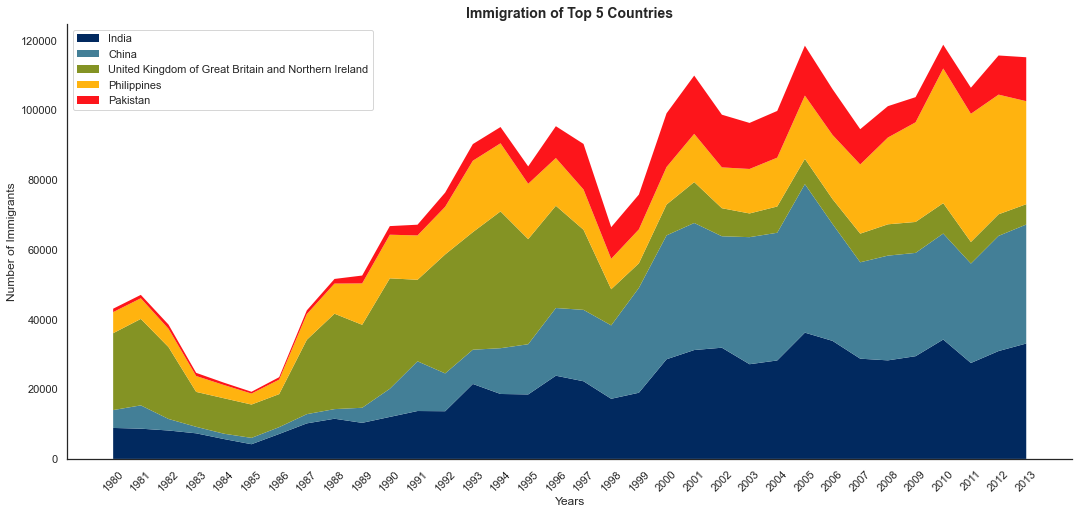

In [14]:
sns.set_style("white")

colors = ["#01295F","#437F97","#849324","#FFB30F","#FD151B"]
labels = ["India", "China", "United Kingdom of Great Britain and Northern Ireland", "Philippines", "Pakistan"]

df_top5.index = df_top5.index.map(int)
plt.figure(figsize=(18,8))

plt.stackplot(years,
            df_top5["India"],
            df_top5["China"],
            df_top5["United Kingdom of Great Britain and Northern Ireland"],
            df_top5["Philippines"],
            df_top5["Pakistan"],
            colors=colors,
            edgecolor='none')
plt.title('Immigration of Top 5 Countries', fontsize=14,weight="bold")
plt.ylabel('Number of Immigrants')
plt.xlabel('Years')
plt.xticks(years,rotation=45)
plt.legend(labels=labels, loc= "upper left")
sns.despine()

plt.show()

## Top 15 Countries to contribute to imigration
Which are the top 15 countries contributing to Canada's immigration over the studied perios (1980-2013)

### Dataset Manipulation

In [15]:
# Sorting by Total immigrants
df_sorted = df.sort_values(by='Total', ascending=True)
# Getting top 16 and removing the sum entry
df_top15 = df_sorted['Total'].tail(16)
df_top15 = df_top15[:-1]
df_top15.head(15)

Country
Haiti                                                    84813
Romania                                                  93585
Viet Nam                                                 97146
Jamaica                                                 106431
France                                                  109091
Lebanon                                                 115359
Poland                                                  139241
Republic of Korea                                       142581
Sri Lanka                                               148358
Iran (Islamic Republic of)                              175923
United States of America                                241122
Pakistan                                                241600
Philippines                                             511391
United Kingdom of Great Britain and Northern Ireland    551500
China                                                   659962
Name: Total, dtype: int64

### Plotting

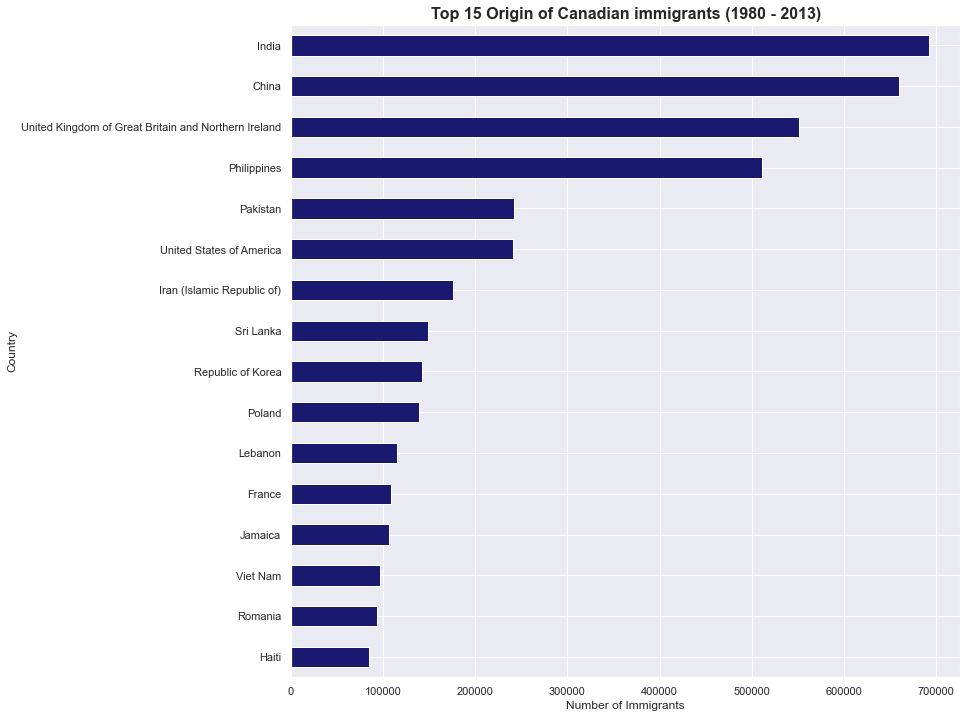

In [16]:
sns.set_style("darkgrid")

df_top15.plot(kind='barh', figsize=(12, 12), color='midnightblue')
plt.xlabel('Number of Immigrants')
plt.title('Top 15 Origin of Canadian immigrants (1980 - 2013)', fontsize=16, fontweight="bold")

 # annotate value labels to each country
for index, value in enumerate(df_top15): 
    label = format(int(value), ',') # format int with commas
    
plt.show()

## Imigration by continent and development level
Which continent has more emigrants to Canada, and are the immigrants coming more from developed or developing countries?

### Dataset manipulation

In [17]:
# grouping imigration numbers by continent and by development level
df_continents = df.groupby('Continent', axis=0).sum()
df_developed = df.groupby('DevName', axis=0).sum()
df_developed = df_developed[:-1]
df_continents = df_continents[:-1]

In [18]:
df_continents

,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,...,2005,2006,2007,2008,2009,2010,2011,2012,2013,Total
Continent,,,,,,,,,,,,,,,,,,,,,
Africa,3951,4363,3819,2671,2639,2650,3782,7494,7552,9894,...,27523,29188,28284,29890,34534,40892,35441,38083,38543,618948
Asia,31025,34314,30214,24696,27274,23850,28739,43203,47454,60256,...,159253,149054,133459,139894,141434,163845,146894,152218,155075,3317794
Europe,39760,44802,42720,24638,22287,20844,24370,46698,54726,60893,...,35955,33053,33495,34692,35078,33425,26778,29177,28691,1410947
Latin America and the Caribbean,13081,15215,16769,15427,13678,15171,21179,28471,21924,25060,...,24747,24676,26011,26547,26867,28818,27856,27173,24950,765148
Northern America,9378,10030,9074,7100,6661,6543,7074,7705,6469,6790,...,8394,9613,9463,10190,8995,8142,7677,7892,8503,241142
Oceania,1942,1839,1675,1018,878,920,904,1200,1181,1539,...,1585,1473,1693,1834,1860,1834,1548,1679,1775,55174


In [19]:
df_developed

,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,...,2005,2006,2007,2008,2009,2010,2011,2012,2013,Total
DevName,,,,,,,,,,,,,,,,,,,,,
Developed regions,51143,56707,53240,32504,29675,28052,32224,55500,62129,68967,...,46695,45071,45591,47664,46805,44158,36946,39682,39712,1714011
Developing regions,47994,53856,51031,43046,43742,41926,53824,79271,77177,95465,...,210762,201986,186814,195383,201963,232798,209248,216540,217825,4695142


### Plotting

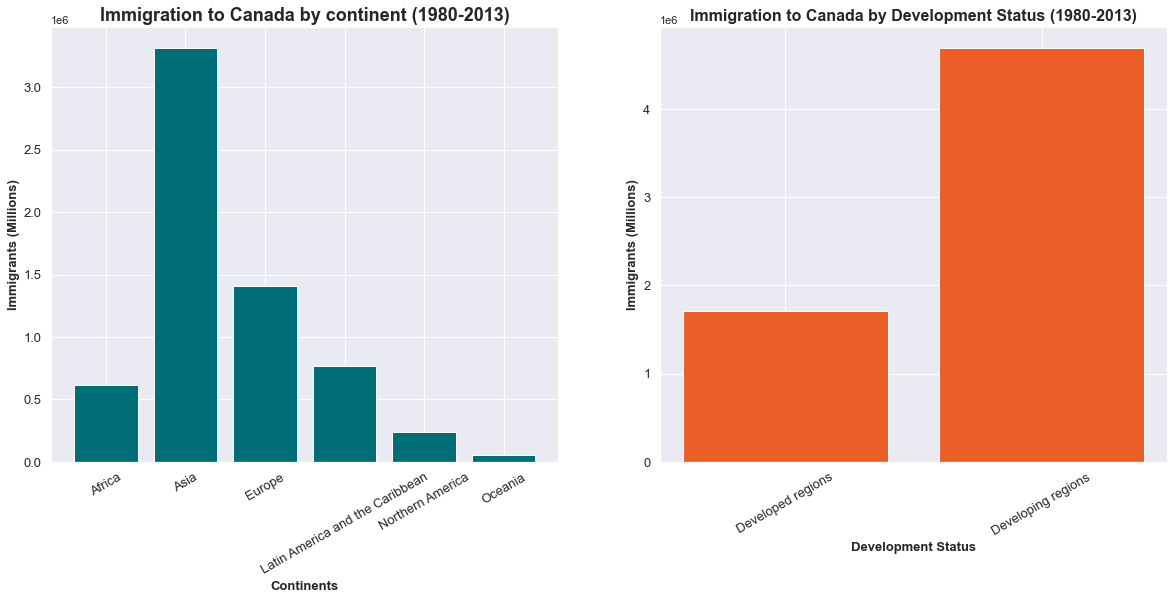

In [20]:
fig = plt.figure(figsize=(20,8))
ax0 = fig.add_subplot(1, 2, 1) # add subplot 1 (1 row, 2 columns, first plot)
ax1 = fig.add_subplot(1, 2, 2) # add subplot 2 (1 row, 2 columns, second plot)

#df_continents.drop("World",axis=0, inplace=True)
plt.subplot(1, 2, 1)
plt.bar(x=df_continents.index.values,height=df_continents["Total"], color= "#006D77")
df_continents.rename({"Latin America and the Caribbean": "Latin America"}, axis="index", inplace=True)
plt.title("Immigration to Canada by continent (1980-2013)", fontsize=18,fontweight="bold")
plt.xticks(rotation=30, fontsize=13)
plt.yticks(fontsize=13)
plt.xlabel("Continents", fontsize=13, weight="bold")
plt.ylabel("Immigrants (Millions)", fontsize=13, weight="bold")

plt.subplot(1, 2, 2)
plt.bar(x=df_developed.index.values,height=df_developed["Total"], color= "#EB5E28")
plt.title("Immigration to Canada by Development Status (1980-2013)", fontsize=16,fontweight="bold")
plt.xticks(rotation=30, fontsize=13)
plt.yticks(fontsize=13)
plt.xlabel("Development Status", fontsize=13, weight="bold")
plt.ylabel("Immigrants (Millions)", fontsize=13, weight="bold")
plt.show()


plt.show()

## Visualizing imigration on each decade
Which decade had more immigrants?

### Dataset manipulation

In [21]:
# creating range of each decade
years_80=list(map(str,range(1980,1990)))
years_90=list(map(str,range(1990,2000)))
years_2000=list(map(str,range(2000,2010)))

# slicing the dataset, dividing it into 3 decades
df_80=df.loc[:,years_80].sum(axis=1)
df_90=df.loc[:,years_90].sum(axis=1)
df_2000=df.loc[:,years_2000].sum(axis=1)

# Merging all into a decades dataset
decade_df=pd.DataFrame({'1980s': df_80, '1990s': df_90, '2000s': df_2000})
decade_df

,1980s,1990s,2000s
Country,,,
Total,1259317,2204176,2414360
India,82154,180395,303591
China,32003,161528,340385
United Kingdom of Great Britain and Northern Ireland,179171,261966,83413
Philippines,60764,138482,172904
...,...,...,...
San Marino,2,1,1
New Caledonia,0,0,3
Marshall Islands,0,0,2


### Plotting

<AxesSubplot:>

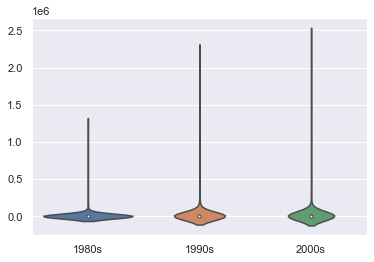

In [22]:
sns.violinplot(data=decade_df)

## Visualizing Brazil vs Argentina
Do Canada have more brazilian or argentinian immigratings?

### Dataset Manipulation

In [23]:
# Getting brazilian and argentinian data throughout the years
df_Br_Ar = df.loc[['Brazil','Argentina'],years].transpose()
df_Br_Ar

Country,Brazil,Argentina
1980,211,368
1981,220,426
1982,192,626
1983,139,241
1984,145,237
1985,130,196
1986,205,213
1987,244,519
1988,394,374
1989,650,538


### Plotting

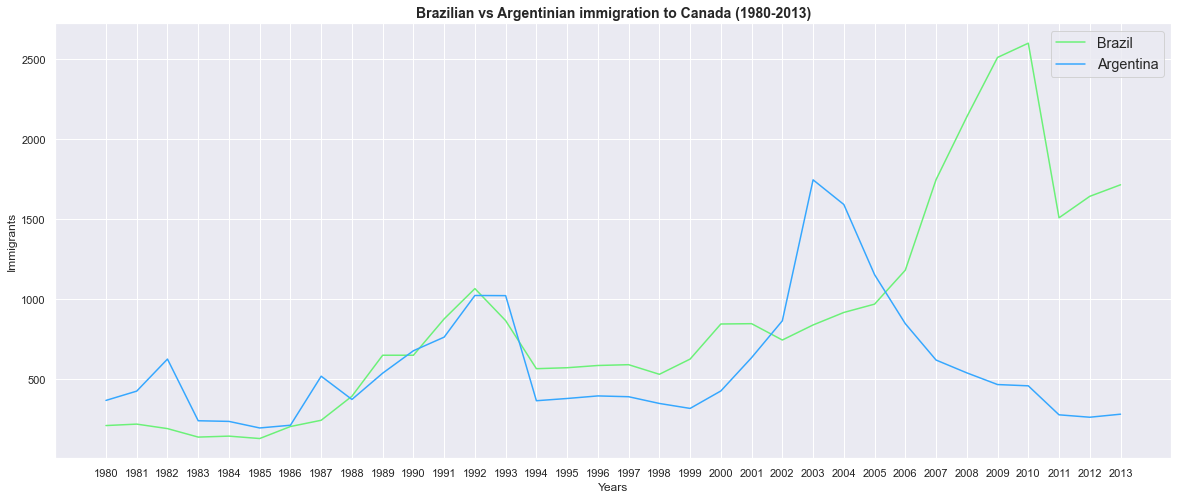

In [24]:
labels = ["Brazil", "Argentina"]
plt.figure(figsize=(20,8))
plt.plot(years,df_Br_Ar["Brazil"], color="#6BF178")
plt.plot(years,df_Br_Ar["Argentina"], color="#35A7FF")
plt.title("Brazilian vs Argentinian immigration to Canada (1980-2013)", fontsize=14,weight="bold")
plt.ylabel("Immigrants")
plt.xlabel("Years")
plt.legend(labels = labels, fontsize = "large")
plt.show()

## Looking at geographical data on map
How is this data distributed on the world map?

### Dataset Manipulation

In [25]:
import folium
world_geo = r'world_countries.json' # geojson file

# create a world map
world_map = folium.Map(location=[0, 0], zoom_start=2, tiles='OpenStreetMap')

In [26]:
# importing raw data again
df_map = pd.read_csv("canada.csv")

In [27]:
# Re doing some basic processing

df_map.drop(['AREA','REG','DEV','Type','Coverage'], axis=1, inplace=True)
df_map.rename(columns={'OdName':'Country', 'AreaName':'Continent','RegName':'Region'}, inplace=True)
df_map.columns = list(map(str, df_map.columns))
df_map['Total'] = df_map.sum(axis=1)
years = list(map(str, range(1980, 2014)))

data dimensions: (197, 39)


/var/folders/kr/l42fkvy92hl2qpjr82yttwcr0000gn/T/ipykernel_22874/2682631737.py:11: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df_map['Total'] = df_map.sum(axis=1)


In [28]:
df_map = df_map[:-2]

### Plotting

In [29]:

# create a numpy array of length 6 and has linear spacing from the minimum count of immigrants to the maximum count of immigrants
threshold_scale = np.linspace(df_map['Total'].min(),
                              df_map['Total'].max(),
                              6, dtype=int)
threshold_scale = threshold_scale.tolist() # convert the numpy array to a list
threshold_scale[-1] = threshold_scale[-1] + 1 # make sure that the last value of the list is greater than the maximum immigration

# Plotting
world_map = folium.Map(location=[0, 0], zoom_start=2, tiles='OpenStreetMap')
world_map.choropleth(
    geo_data=world_geo,
    data=df_map,
    columns=['Country', 'Total'],
    key_on='feature.properties.name',
    threshold_scale=threshold_scale,
    fill_color='Greens', 
    fill_opacity=0.7, 
    line_opacity=0.2,
    legend_name='Immigration to Canada',
    reset=True
)
world_map

/Users/miguel/miniforge3/envs/data-viz/lib/python3.8/site-packages/folium/folium.py:409: FutureWarning: The choropleth  method has been deprecated. Instead use the new Choropleth class, which has the same arguments. See the example notebook 'GeoJSON_and_choropleth' for how to do this.
  warnings.warn(
